In [1]:
import serde.csv, pandas as pd
from pathlib import Path
from tum.actors.main import *
from tum.make_db import CRITICAL_MAAS_DIR

### Generate candidate graph

In [2]:
actor = G.create_actor(
    MinmodGraphInferenceActor,
    [
        DBActorArgs(
            kgdbs=[
                KGDBArgs(
                    name=KGName.Generic,
                    version="20231130",
                    datadir=CRITICAL_MAAS_DIR / "data/databases",
                )
            ]
        ),
        DataActorArgs(skip_unk_ont_ent=True, skip_no_sm=True),
        MinmodGraphGenerationActorArgs(
            train_dsquery="darpa-criticalmaas",
            meta_prop_file=CRITICAL_MAAS_DIR
            / "ta2-table-understanding/data/meta_property/data.csv",
        ),
        MinmodGraphInferenceActorArgs(),
    ],
)

2023-12-04 11:17:05.709 | DEBUG    | ream.actor_graph:create_actor:264 - Determine the actor to run...
2023-12-04 11:17:05.709 | DEBUG    | ream.actor_graph:create_actor:266 - Initializing argument parser...
2023-12-04 11:17:05.710 | DEBUG    | ream.actor_graph:create_actor:283 - Constructing the actor...


In [3]:
test_exs = Dataset(CRITICAL_MAAS_DIR / "ta2-table-understanding/examples").load()

In [4]:
with actor.data_actor.use_examples(
    "darpa-criticalmaas",
    Dataset(CRITICAL_MAAS_DIR / "ta2-table-understanding/data/known_models").load(),
    prefix="",
):
    output = []
    for test_ex in test_exs:
        with actor.data_actor.use_example(
            test_ex.id,
            test_ex,
        ) as testquery:
            sm = actor(testquery)
            output.append(sm[0])

2023-12-04 11:17:11.182 | DEBUG    | MinmodGraphGenerationActor:ream.actors.base:get_working_fs:93 - Using working directory: /Volumes/research/data/ream/MinmodGraphGenerationActor/v103/002
2023-12-04 11:17:11.269 | INFO     | sm.misc.ray_helper:ray_init:35 - Initialize ray with args: {'log_to_driver': False}
2023-12-04 11:17:13,109	INFO worker.py:1664 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8266 


Compute similarity matrix:   0%|          | 0/20 [00:00<?, ?it/s]

2023-12-04 11:17:20.076 | DEBUG    | dsl.dsl:train_model:98 - Performance:
2023-12-04 11:17:20.081 | DEBUG    | dsl.dsl:train_model:101 - Save model...


              precision    recall  f1-score   support

       False       0.99      0.93      0.96       366
        True       0.33      0.86      0.48        14

    accuracy                           0.93       380
   macro avg       0.66      0.90      0.72       380
weighted avg       0.97      0.93      0.95       380



/Volumes/research/dsl/dsl/feature_extraction/column_base/numeric.py:11: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  return ks_2samp(col1.get_numeric_data(), col2.get_numeric_data())[1]


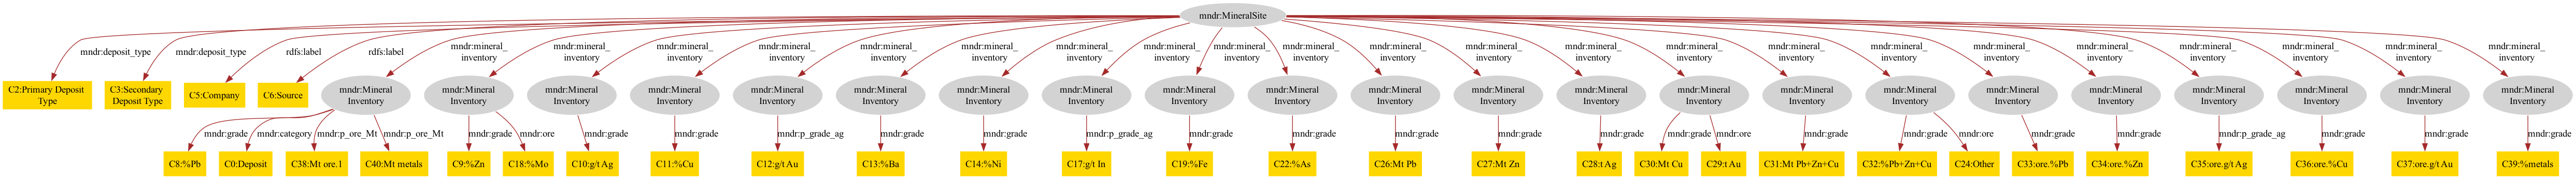

In [5]:
for sm in output:
    sm.draw()